In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 주어진 학습 데이터 벡터 x에 대해 모든 예측 값을 벡터로 리턴하는 함수
def prediction(theta_0, theta_1, x):    
    result = theta_0 + theta_1*x
    return result

In [7]:
# 모든 예측 값들과 목표 변수들의 오차를 벡터로 리턴해주는 함수
def prediction_difference(theta_0, theta_1, x, y):
    pred_value = prediction(theta_0, theta_1, x)
    error = pred_value - y
    return error

In [12]:
# 주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    m = len(x)  # 총 데이터 개수
    cost_list = []  # 경사하강 할 때 마다의 손실을 저장.

    for i in range(iterations):  # 정해진 횟수만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산, error는 모든 오차값이 있는 벡터.
        cost = (error@error) / (2*m)  # error@error: 모든 오차값을 더하고 제곱 : 1/2m x ∑(hᶿ(x⁽ⁱ⁾) - y⁽ⁱ⁾)², 손실함수의 아웃풋(MSE)을 구하는 식.
        cost_list.append(cost)  # cost 값을 cost_list에 추가.

        theta_0 = theta_0 - alpha*error.mean()
        theta_1 = theta_1 - alpha*(error*x).mean()

        # 가설함수를 200번 개선하는 동안, 10번에 한 번씩만 그래프 출력
        if i % 10 == 0:
            # 가설함수가 개선되는 모습 시각화 (산점도)
            plt.scatter(house_size, house_price)  # 실제 데이터를 산점도로 시각화
            plt.plot(house_size, prediction(theta_0, theta_1, x), color='red')  # 가설함수 시각화, y축: 예측된 집 가격
            plt.show()

    return theta_0, theta_1, cost_list

error@error 식이 모든 오차값을 더하고 제곱하는 기능을 하는 이유?  
- @ : 행렬곱, 벡터 내적곱.  
- 벡터의 차원이 같을 때, 예를 들어 벡터 a와 b 모두 5열 1행인 벡터라고 한다면, a@b는 <span style='color:yellowgreen'>각 벡터의 원소끼리 곱한 것의 합</span>이다.
- 같은 원리로, 벡터인 자기 자신을 내적곱하면 ∑(aᵢ)²을 계산하는 식이 된다.
    - 여기서 i는 i번째 값을 의미한다.

In [13]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
th_0 = 2.5
th_1 = 0

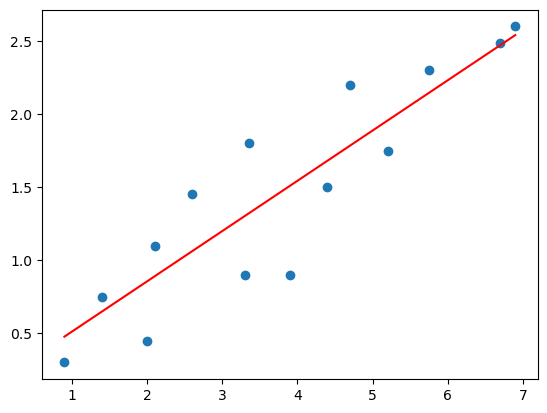

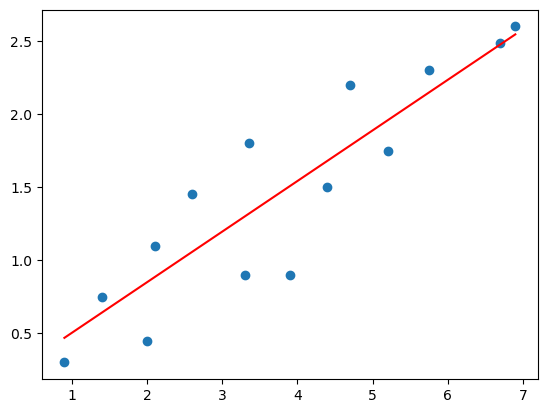

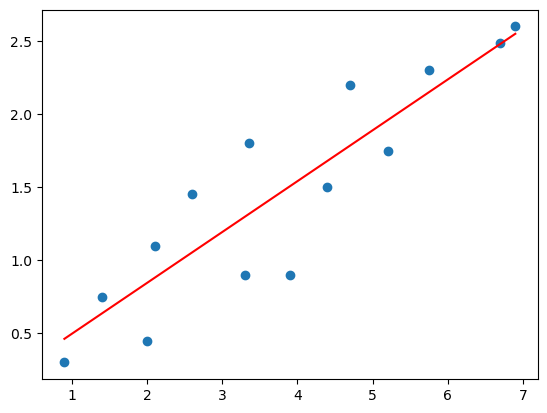

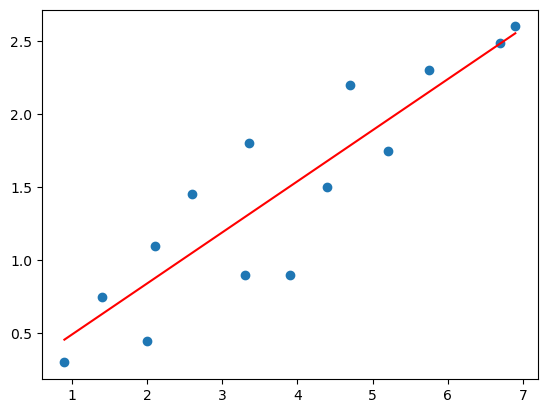

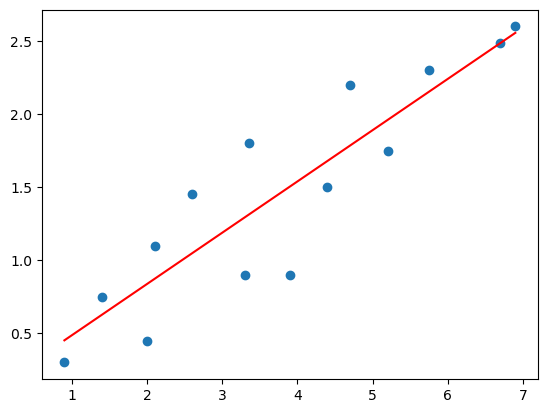

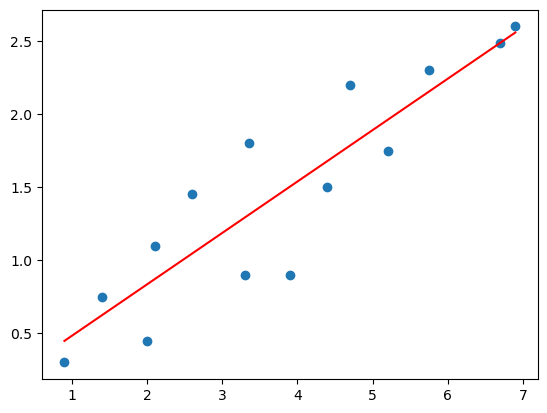

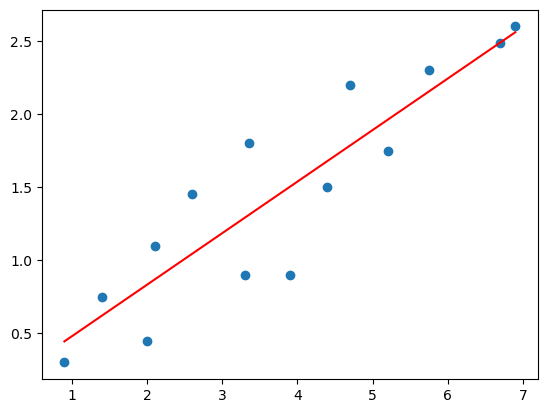

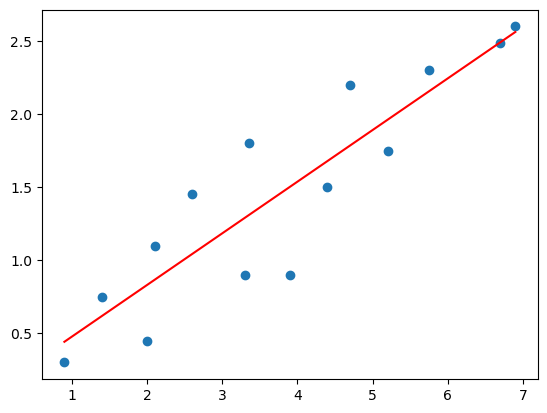

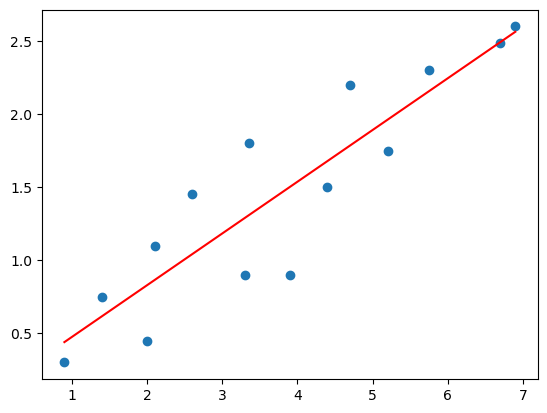

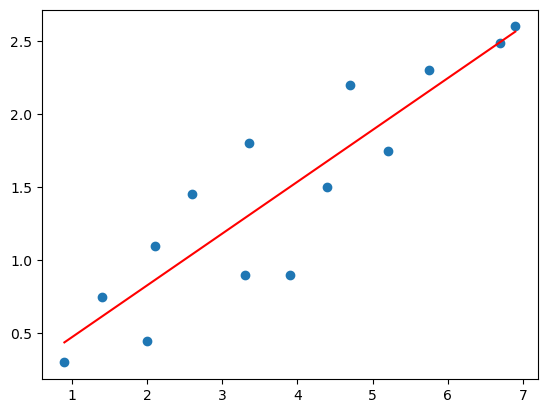

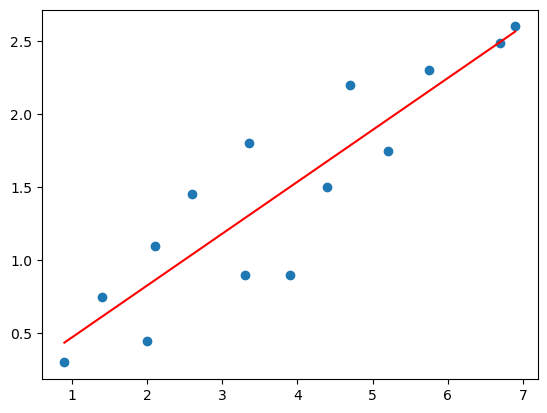

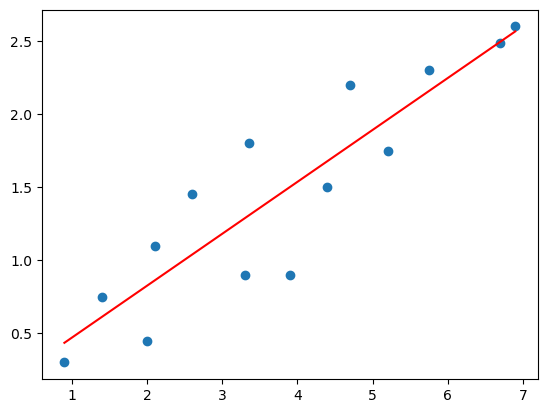

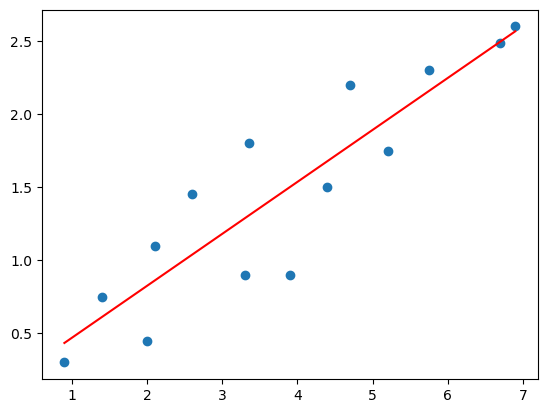

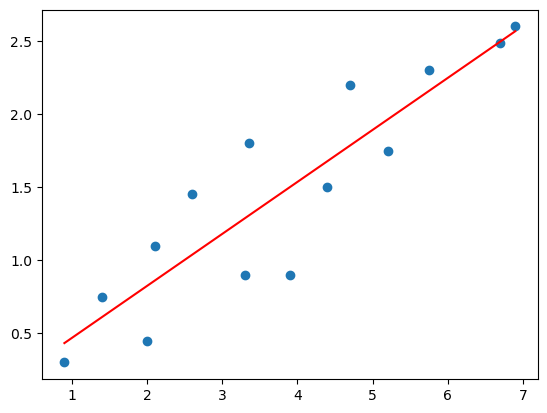

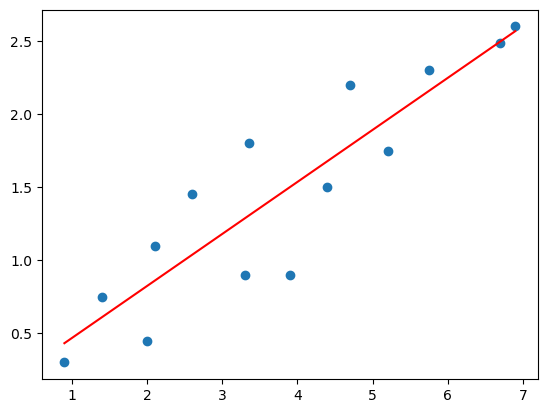

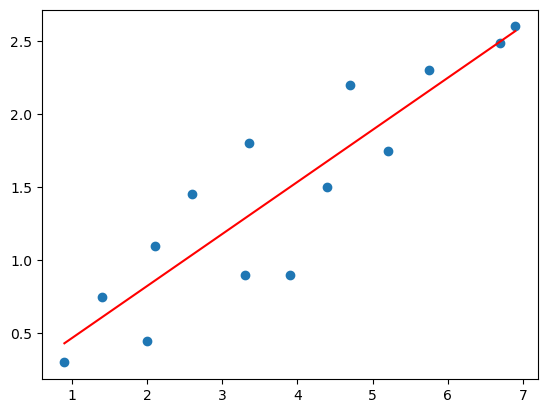

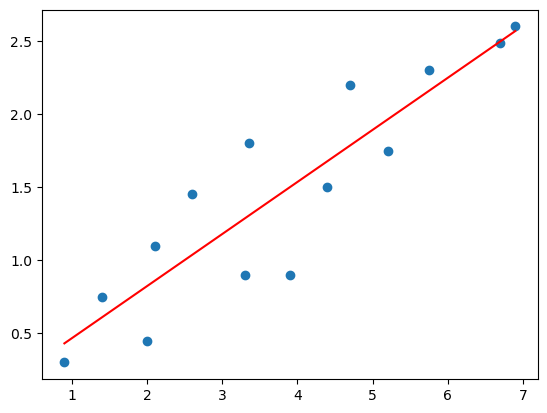

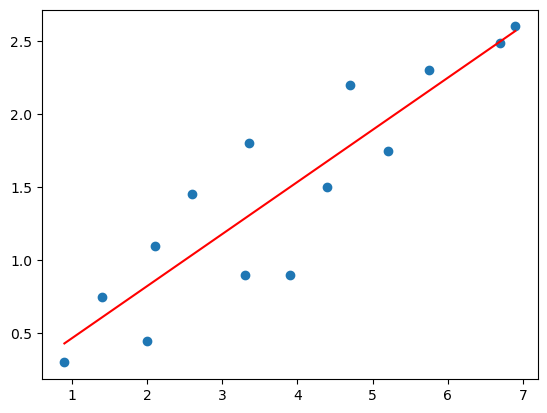

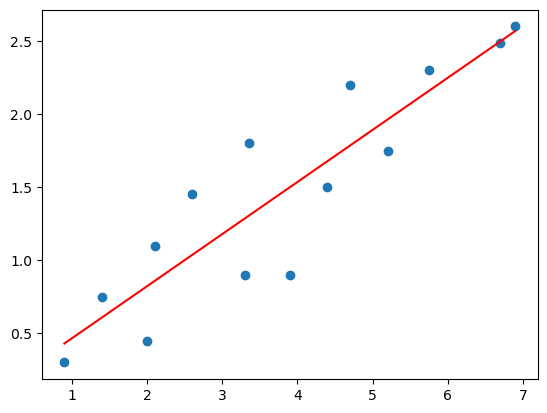

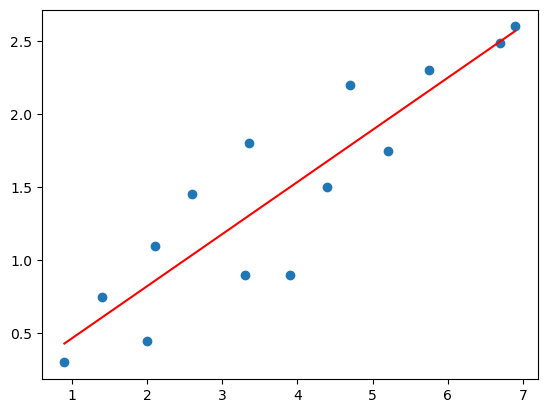

(0.10843339884797569, 0.3566912224719406)

In [15]:
# 학습률 0.1로 200번 경사 하강
th_0, th_1, cost_list = gradient_descent(th_0, th_1, house_size, house_price, 200, 0.1)

th_0, th_1

# 실제 가설함수가 개선되는 모습 시각화

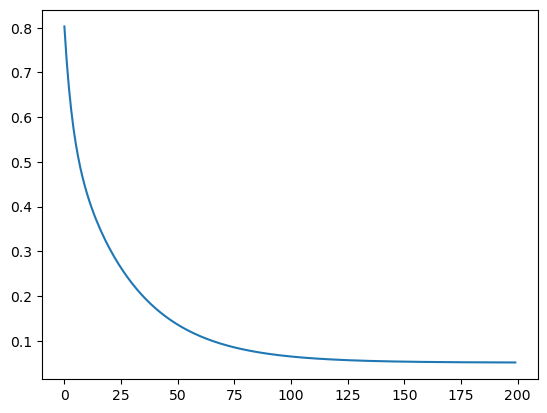

In [10]:
# 손실이 줄어드는 것을 시각화
plt.plot(cost_list)